In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path_2 = 'C:/Users/лепеха/OneDrive/Рабочий стол/Учеба/IceaCreamFrozenDessert.csv'

IceCream_df = pd.read_csv(file_path_2)

In [2]:
IceCream_df

,DATE,value
0,01/01/1972,59.9622
1,01/02/1972,67.0605
2,01/03/1972,74.2350
3,01/04/1972,78.1120
4,01/05/1972,84.7636
...,...,...
571,01/08/2019,102.6085
572,01/09/2019,100.1741
573,01/10/2019,90.1684
574,01/11/2019,79.7223


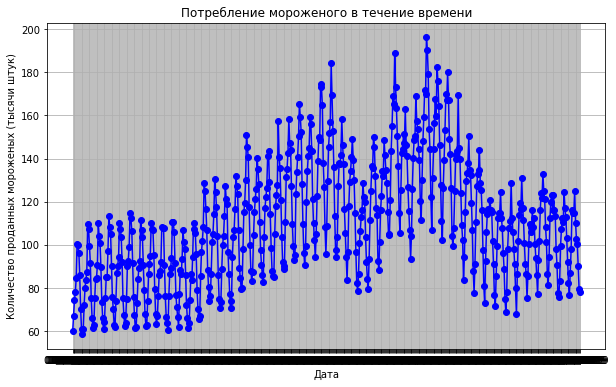

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(IceCream_df['DATE'], IceCream_df['value'], marker='o', linestyle='-', color='b')
plt.title('Потребление мороженого в течение времени')
plt.xlabel('Дата')
plt.ylabel('Количество проданных мороженых (тысячи штук)')
plt.grid(True)

In [4]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

def correlation_dimension(data, radius, threshold):
    n = len(data)
    distance_matrix = squareform(pdist(data.reshape(-1, 1)))  # Расстояния между всеми парами точек
    correlation_matrix = np.zeros((n, n))

    # Вычислить корреляции между всеми парами точек в одном вызове
    correlation_matrix = np.corrcoef(data.reshape(1, -1))

    # Вычислить корреляционную размерность
    correlation_dimension = np.sum(correlation_matrix >= threshold) / n

    return correlation_dimension

In [11]:
import nolds
from sklearn.manifold import TSNE

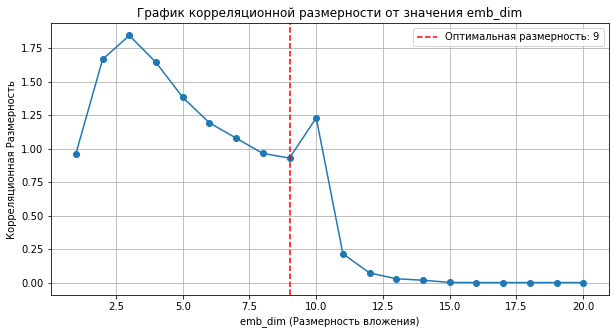

Оптимальная размерность вложения: 9


In [8]:
data = IceCream_df['value'].to_numpy() 
min_dim = 1
max_dim = 20 
dimensions = list(range(min_dim, max_dim + 1))
correlation_dimensions = []
for emb_dim in dimensions:
    correlation_dimension = nolds.corr_dim(data, emb_dim=emb_dim)
    correlation_dimensions.append(correlation_dimension)

# Поиск оптимальной размерности на основе метода локтя
optimal_dimension = None
for i in range(1, len(correlation_dimensions) - 1):
    if correlation_dimensions[i] < correlation_dimensions[i - 1] and correlation_dimensions[i] < correlation_dimensions[i + 1]:
        optimal_dimension = dimensions[i]
        break

# Построим график корреляционной размерности от значения emb_dim
plt.figure(figsize=(10, 5))
plt.plot(dimensions, correlation_dimensions, marker='o', linestyle='-')
plt.title('График корреляционной размерности от значения emb_dim')
plt.xlabel('emb_dim (Размерность вложения)')
plt.ylabel('Корреляционная Размерность')
plt.grid(True)

# Выводим значение оптимальной размерности на графике
if optimal_dimension is not None:
    plt.axvline(x=optimal_dimension, color='r', linestyle='--', label=f'Оптимальная размерность: {optimal_dimension}')
    plt.legend()

plt.show()

# Выводим оптимальную размерность
if optimal_dimension is not None:
    print(f"Оптимальная размерность вложения: {optimal_dimension}")
else:
    print("Оптимальная размерность не найдена.")

In [9]:
nolds.corr_dim(IceCream_df['value'].to_numpy(),9)

1.0973478280020725

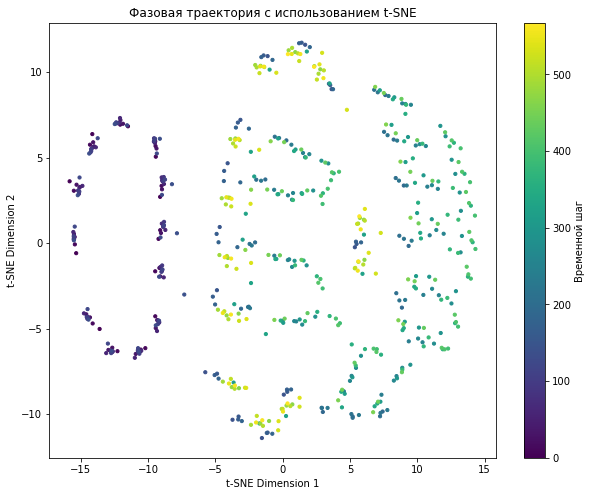

In [12]:
data =IceCream_df['value'].to_numpy()
emb_dim = 9
embedded_data = np.array([data[i:i+emb_dim].flatten() for i in range(len(data) - emb_dim + 1)])
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
embedded_data_tsne = tsne.fit_transform(embedded_data)
plt.figure(figsize=(10, 8))
plt.scatter(embedded_data_tsne[:, 0], embedded_data_tsne[:, 1], c=range(len(embedded_data_tsne)), cmap='viridis', s=10)
plt.colorbar(label='Временной шаг')
plt.title('Фазовая траектория с использованием t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

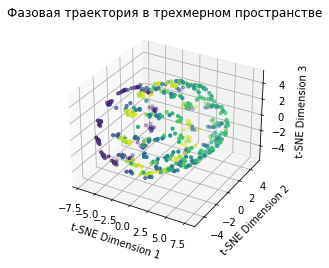

In [13]:
 
# Задайте размерность вложения (можете использовать оптимальное значение, которое вы нашли)
emb_dim = 9

# Создаем фазовую траекторию, встроив данные в трехмерное пространство
embedded_data = np.array([data[i:i+emb_dim].flatten() for i in range(len(data) - emb_dim + 1)])

# Применяем t-SNE для снижения размерности до 3D
tsne = TSNE(n_components=3, perplexity=30, n_iter=300)
embedded_data_tsne = tsne.fit_transform(embedded_data)

# Строим график фазовой траектории в трехмерном пространстве
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embedded_data_tsne[:, 0], embedded_data_tsne[:, 1], embedded_data_tsne[:, 2], c=range(len(embedded_data_tsne)), cmap='viridis', s=10)
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')
ax.set_title('Фазовая траектория в трехмерном пространстве')
plt.show()